In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import comptic
from comptic.propagation import prop_kernel_rayleigh_spatial, prop_kernel_rayleigh_fourier
import matplotlib.pyplot as plt
import numpy as np
from comptic import imaging
from comptic import illumination
from comptic import simulation
from comptic.fft import Ft, iFt
from comptic import ledarray

ledarray.cartToNa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
shape = (512, 512)

parameters = {
    'axial_distance': 50e-3,
    'illumination_wavelength': 0.55e-6,
    'camera_pixel_size': 6.5e-6,
    'objective_magnification': 4,
    'system_magnification': 1,
    'objective_numerical_aperture': 0.1
}

Text(0.5, 1.0, 'Plane Wave Illum')

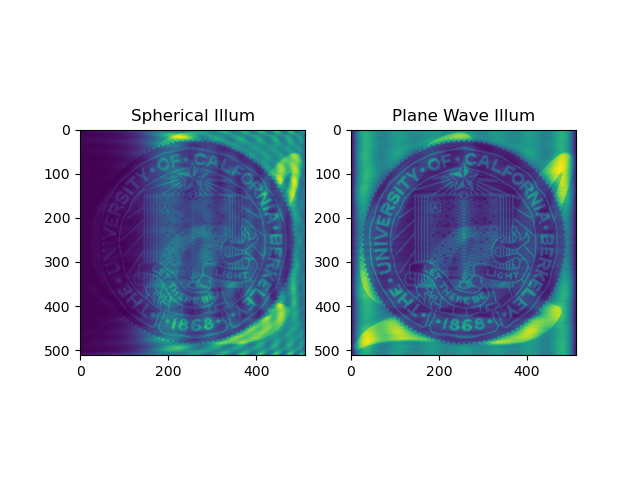

In [163]:
source_position = np.asarray([0, 4.8e-3, 50e-3]) # Try 4.4 and 4.5

# Generate spherical illumination profile
illum_planar = illumination.plane_wave_spatial(shape, **parameters, source_position=source_position)

# Generate spherical illumination profile
illum_spherical = illumination.spherical_wave_spatial(shape, **parameters, source_position=source_position)

# Generate pupil
pupil = imaging.pupil(shape, **parameters)

# Generate sample
sample = simulation.ucb(shape)

# Generate intensity
intensity_spherical = np.abs(iFt(pupil * Ft(sample * illum_spherical))) ** 2
intensity_planar = np.abs(iFt(pupil * Ft(sample * illum_planar))) ** 2

# Plot
# plt.figure(figsize=(8,3))
# plt.subplot(131)
# plt.imshow((np.abs(Ft(illum_spherical))))
# plt.subplot(132)
# plt.imshow((np.abs(Ft(illum_planar))))
# plt.subplot(133)
# plt.imshow((np.abs(pupil)))

# Plot
plt.figure()
plt.subplot(121)
plt.imshow(intensity_spherical)
plt.title('Spherical Illum')
plt.subplot(122)
plt.imshow(intensity_planar)
plt.title('Plane Wave Illum')

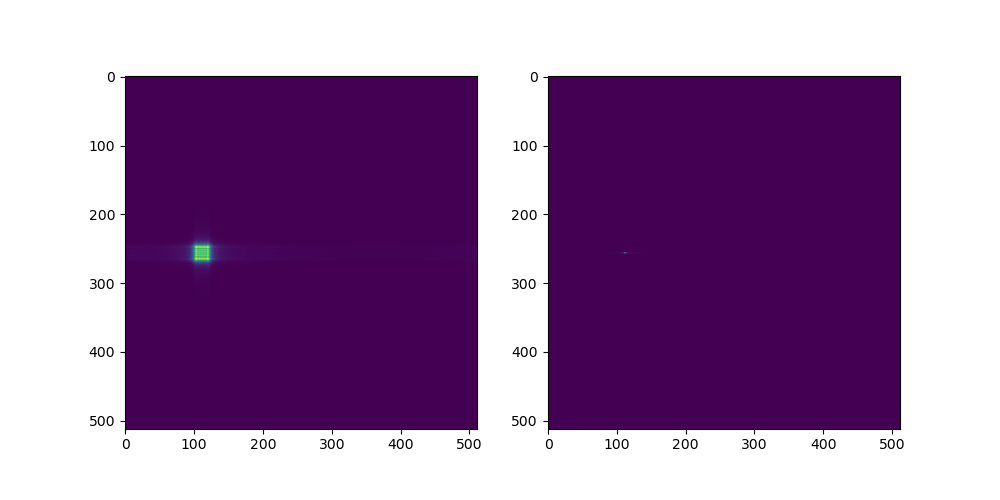

In [164]:
# Plot
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow((np.abs(Ft(illum_spherical))))
plt.subplot(122)
plt.imshow((np.abs(Ft(illum_planar))))